# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импортиртируем библиотеку pandas
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # прочитаем файл, с использовапнием разделителя

In [ ]:
#выведем на экран первые 5 строк 
display(data.head())

In [3]:
#выведем информацию по данным
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

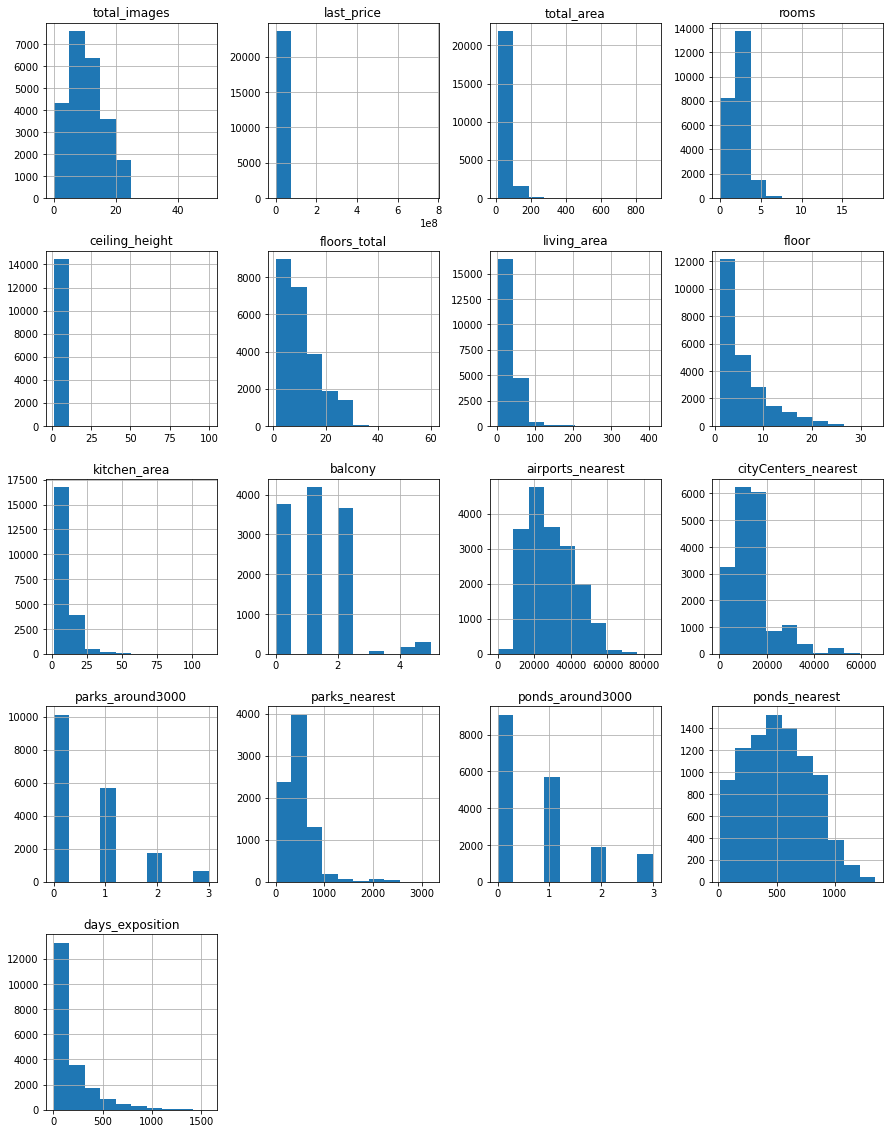

In [4]:
# Построим гистограмму для всех столбцов
import matplotlib.pyplot as plt
data.hist(figsize=(15, 20))
plt.show();

### Предобработка данных

**Произведем предобработку данных в колонках: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition**
    

In [5]:
# проверим количество пропусков в процентом соотношении
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [6]:
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

In [7]:
# заменим пропущенные значения в колонке ceiling_height на медианное значение в зависимости от населенного пункта
for local_name in data['locality_name'].unique():
    median=data.loc[data['locality_name']==local_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name']==local_name), 'ceiling_height']=median

data.loc[data['ceiling_height'].isna(), 'ceiling_height']=data['ceiling_height'].median()

# заменим пропущенные значения в колонке floors_total на медианное значение
data['floors_total']=data['floors_total'].fillna(data['floors_total'].median())

# заменим пропущенные значения в колонке cityCenters_nearest на медианное значение так же в зависимости от населенного пункта
for local_name in data['locality_name'].unique():
    median=data.loc[data['locality_name']==local_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name']==local_name), 'cityCenters_nearest']=median


In [8]:
# в связи с предупреждениями, выведем процентное соотношение пропущенных значений ceiling_height и cityCenters_nearest, что бы посмотреть на изменения
data[['ceiling_height', 'floors_total', 'cityCenters_nearest']].isna().mean()*100

ceiling_height          0.000000
floors_total            0.000000
cityCenters_nearest    22.760454
dtype: float64

In [9]:
# заменим пропущенные значения в kitchen_area на разницу между total_area и living_area
data['kitchen_area']=data['kitchen_area'].fillna(data['total_area']-data['living_area'])
# заменим оставшиеся пропущенные значения в kitchen_area на медианные значения
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())

In [10]:
#заменим пропущенные значения в living_area на разницу между total_area и kitchen_area
data['living_area']=data['living_area'].fillna(data['total_area']-data['kitchen_area'])

In [11]:
#заменим пропущенные значения в колонках balcony, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, 
# days_exposition на 0
data['balcony']=data['balcony'].fillna(0) #замена пропущенных значений в колонке balcony на 0
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['parks_nearest']=data['parks_nearest'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['ponds_nearest']=data['ponds_nearest'].fillna(0)
data['days_exposition']=data['days_exposition'].fillna(0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [13]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

В связи с тем, что колонка is_apartment содержит False и True, нет возможности заполнить пропущенные значения. В случае, если бы данная колонка содержала бы только True или False, можно было бы предположить, что пропущенные значения являются противоположными.

In [14]:
#для понимания, выведем на экран срез таблицы по days_exposition и first_day_exposition
display(data[['days_exposition', 'first_day_exposition']])

,days_exposition,first_day_exposition
0,0.0,2019-03-07T00:00:00
1,81.0,2018-12-04T00:00:00
2,558.0,2015-08-20T00:00:00
3,424.0,2015-07-24T00:00:00
4,121.0,2018-06-19T00:00:00
...,...,...
23694,0.0,2017-03-21T00:00:00
23695,45.0,2018-01-15T00:00:00
23696,0.0,2018-02-11T00:00:00
23697,602.0,2017-03-28T00:00:00


Вероятно, что данные в колонке days_exposition заполняются автоматически. В соответствии с этим, можно сделать вывод, что строки days_exposition с пропущенными значениями - это объявления, на которые откликнулись сразу, в день размещения, или объявления, которые все еще размещены на сайте.

In [15]:
# В колонках parks_around3000, ponds_around3000, floors_total, balcony, days_exposition не может быть дробных значений. 
# В связи с этим, мы изменили тип данных с float на int
data['parks_around3000']=data['parks_around3000'].astype(int)
data['ponds_around3000']=data['ponds_around3000'].astype(int)
data['floors_total']=data['floors_total'].astype(int)
data['balcony']=data['balcony'].astype(int)
data['days_exposition']=data['days_exposition'].astype(int)
data['locality_name']=data['locality_name'].astype(str)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [17]:
# так же изменим тип данных столбца с ценой
data['last_price']=data['last_price'].astype(int)


In [18]:
# выведем количество уникальных записей в колонке locality_name
print(data['locality_name'].nunique())

365


In [19]:
#устраним неявные дубликаты в столбце locality_name
data['locality_name']=data['locality_name'].str.replace('посёлок','поселок')
data['locality_name']=data['locality_name'].str.replace('городской поселок','поселок городского типа')
print(data['locality_name'].nunique())

324


In [20]:
#выведем уникальные значения в ceiling_height
print(data['ceiling_height'].sort_values().unique())
print()
print('Количество уникальных записей в столбце ceiling_height:', (data['ceiling_height'].nunique()))

[  1.      1.2     1.75    2.      2.2     2.25    2.3     2.34    2.4
   2.45    2.46    2.47    2.48    2.49    2.5     2.51    2.515   2.52
   2.525   2.53    2.54    2.55    2.555   2.56    2.56    2.57    2.575
   2.58    2.59    2.6     2.6     2.61    2.615   2.62    2.625   2.63
   2.64    2.65    2.65    2.66    2.67    2.675   2.68    2.69    2.7
   2.71    2.72    2.725   2.73    2.74    2.75    2.76    2.77    2.78
   2.79    2.8     2.81    2.82    2.83    2.84    2.85    2.86    2.87
   2.88    2.89    2.9     2.91    2.92    2.93    2.94    2.95    2.96
   2.97    2.98    2.99    3.      3.01    3.02    3.03    3.04    3.05
   3.06    3.07    3.08    3.09    3.1     3.11    3.12    3.13    3.14
   3.15    3.16    3.17    3.18    3.2     3.21    3.22    3.23    3.24
   3.25    3.26    3.27    3.28    3.29    3.3     3.31    3.32    3.33
   3.34    3.35    3.36    3.37    3.38    3.39    3.4     3.42    3.43
   3.44    3.45    3.46    3.47    3.48    3.49    3.5     3.51  

In [21]:
def high_ceiling(row):
    if row>=20:
        correct=row/10
        return correct
    return row
data['ceiling_height']=data['ceiling_height'].apply(high_ceiling)


In [22]:
data=data.loc[data['ceiling_height']!=1.0]
print('Количество уникальных записей в столбце ceiling_height:',(data['ceiling_height'].nunique()))

Количество уникальных записей в столбце ceiling_height: 187


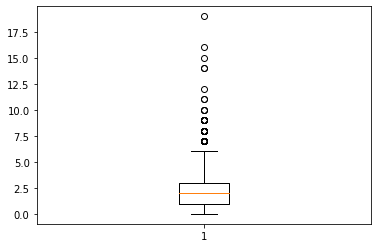

In [23]:
plt.boxplot(data['rooms'])
plt.show()

На графике видно, что квартиры с количеством комнат свыше 6, являются аномальными. Но удалим из таблицы только квартиры с комнатностью свыше 8, так как: обозначения этих квартир на графике уже меньше чем остальных, а так же изучив данный вопрос в интернете, было выявлено отсутствие квартир с количеством комнат 9 и больше.

In [24]:
# удалим из таблицы аномальные значения
data=data.loc[data['rooms']!=15]
data=data.loc[data['rooms']!=9]
data=data.loc[data['rooms']!=10]
data=data.loc[data['rooms']!=11]
data=data.loc[data['rooms']!=14]
data=data.loc[data['rooms']!=19]
data=data.loc[data['rooms']!=16]
data=data.loc[data['rooms']!=12]

In [25]:
print(data['rooms'].value_counts())

1    8047
2    7939
3    5814
4    1180
5     326
0     197
6     105
7      59
8      12
Name: rooms, dtype: int64


При группировки квартир по количеству комнат, были выявлены аномальные значения. В связи с тем, что квартиры свыше 8 комнат маловероятны и таких квартир в базе очень мало, целесообразнее удалить данные строки.

In [26]:
# изменим вид даты и времени
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [27]:
#проверим таблицу на явные дубликаты
print(data.duplicated().sum()) 

0


В данном разделе была проведена предобработка данных для дальнейшей работы с таблицей. Были заполнены пропущенные значения:
    
- в колонках ceiling_height, cityCenters_nearest на медианные значения в зависимости от населенного пункта. 
- пропущенные значения в floors_total заменены на медианные. 
- в колонке kitchen_area были произведены расчеты исходя из общей площади и жилой
- в living_area были произведены расчеты исходя из общей площади и площадью кухни
- в колонках balcony, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, 
- days_exposition пропуски заменены на 0

    Заменить пропуски в колонках is_appartment и days_exposition не представляется возможным.
    Устранены неявные дубликаты в locality_name. Изменены аномальные значения в ceiling_height и rooms. Изменен формат даты.

### Посчитайте и добавьте в таблицу новые столбцы

In [65]:
# создадим новую колонку с ценой на квадратный метр
data['price_of_meter']=data['last_price']/data['total_area']


<AxesSubplot:>

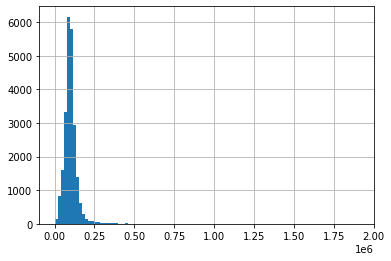

In [29]:
# выведем на экран гистограмму price_of_meter, на 100 корзин
data['price_of_meter'].hist(bins=100)

На графике видно, что пик цены за квадратный метр находится примерно в 100 000 руб.

In [30]:
# изменим тип даты на datetime64[M]
data['first_day_exposition'].astype('datetime64[M]')

0       2019-03-01
1       2018-12-01
2       2015-08-01
3       2015-07-01
4       2018-06-01
           ...    
23694   2017-03-01
23695   2018-01-01
23696   2018-02-01
23697   2017-03-01
23698   2017-07-01
Name: first_day_exposition, Length: 23679, dtype: datetime64[ns]

In [31]:
#добавим колонку с днем недели размещения объявления, где 0-понедельник, 1-вторник и так далее
data['weekday']=data['first_day_exposition'].dt.weekday
print(data['weekday'].head())

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64


<AxesSubplot:>

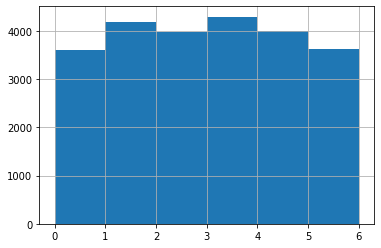

In [32]:
# выведем на экран гистограмму по weekday, на 6 корзин
data['weekday'].hist(bins=6)

На графике видно, что больше всего объявлений опубликованно в понедельник и в четверг.

In [33]:
#добавим колонку с месяцем размещения объявления
data['month']=data['first_day_exposition'].dt.month
print(data['month'].head())

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64


<AxesSubplot:>

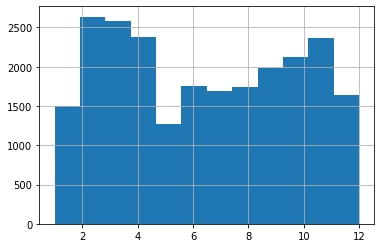

In [34]:
# выведем на экран гистограмму по month, на 12 корзин
data['month'].hist(bins=12)

На графике видно, что самыми полупялрыми месяцами, для публикации объявления, являлись февраль, март и ноябрь.

In [35]:
# добавим колонку с годом размещения объявления
data['year']=data['first_day_exposition'].dt.year
print(data['year'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64


<AxesSubplot:>

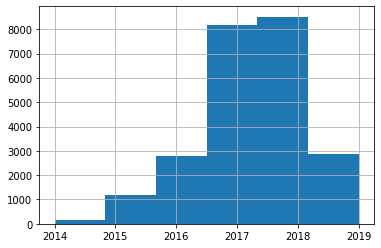

In [36]:
# выведем на экран гистограмму по year, на 6 корзин
data['year'].hist(bins=6)

На графике видно, что в 2017 и в 2018 наибольшее количество объявления.

In [37]:
#добавим колонку с типом этажа квартиры
def type_floor(row):
    try:
        if row['floor']==row['floors_total']:
            return 'последний этаж'
        if row['floor']==1:
            return 'первый этаж'
        return 'другое'
    except:
        return 'нет данных'
data['type_floor']=data.apply(type_floor, axis=1)

print(data[['floor', 'floors_total','type_floor']].head(20))

    floor  floors_total      type_floor
0       8            16          другое
1       1            11     первый этаж
2       4             5          другое
3       9            14          другое
4      13            14          другое
5       5            12          другое
6       6            26          другое
7      22            24          другое
8      26            27          другое
9       7             9          другое
10      3            12          другое
11      4             5          другое
12      5             5  последний этаж
13      5             5  последний этаж
14      1             6     первый этаж
15      5            14          другое
16      1             5     первый этаж
17      7            17          другое
18      2             5          другое
19      8            16          другое


<AxesSubplot:>

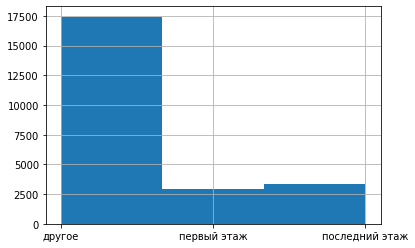

In [38]:
# выведем на экран гистограмму по type_floor, на 3 корзины
data['type_floor'].hist(bins=3)

Наибольшее количество объявлений о квартирах, находящихся выше первого этажа и ниже последнего. 

In [39]:
#создадим колонку с расстоянием до центра города в километрах
data['cityCenters_nearest_km']=(data['cityCenters_nearest']/1000).round()
print(data['cityCenters_nearest_km'])


0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23679, dtype: float64


<AxesSubplot:>

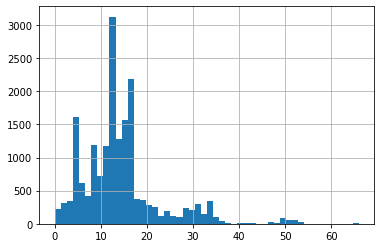

In [40]:
# выведем на экран гистограмму по cityCenters_nearest_km, на 50 корзин
data['cityCenters_nearest_km'].hist(bins=50)

На графике видно, что наиболее часто встречающееся расстояние до центра города это это 12 км.

### Проведите исследовательский анализ данных

Среднее количество дней на продажу: 156.53503104016218
Среднее количество дней на продажу, медианное значение: 74.0


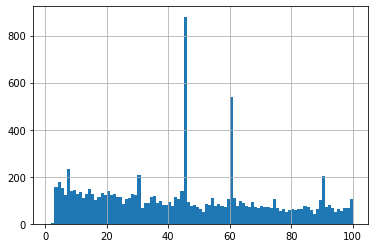

In [41]:
# выведем на экран гистограмму по days_exposition и средние сроки продаж квартир
data['days_exposition'].hist(bins=99, range=(1,100))
print('Среднее количество дней на продажу:', data['days_exposition'].mean())
print('Среднее количество дней на продажу, медианное значение:', data['days_exposition'].median())

Самое большое количество квартир либо еще не проданы, либо были куплены сразу, так как срок размещения составляет 0.
Так же на графике можно наблюдать следующие аномалии:
    
- первые несколько дней после размещения объявления квартиры не продавались.
- самый пик продаж квартир составляет примерно на 47 день и 60.
    
    Среднее арифметическое срока продажи квртиры составляет 156 дней, а среднее медианное - 74. Разница в два раза. Значит в данных есть очень большие значения. Выведем на экран "ящик с усами" для наглядного представления выбросов.

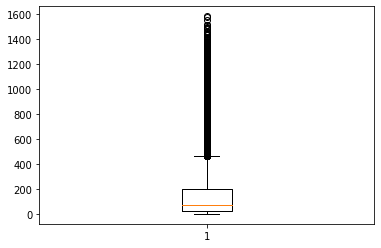

In [42]:
plt.boxplot(data['days_exposition'])
plt.show()

На данном графике видно большое количество вбросов, свыше 500 и до 1600 дней, что и повлияло на большую разницу между средним арифметическим значением и медианным.

<AxesSubplot:>

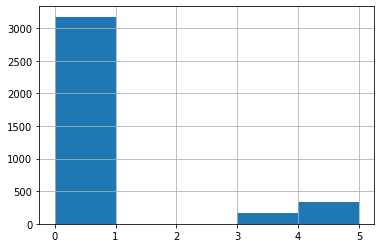

In [43]:
#для анализа самых быстрых продаж выведем гистограмму еще раз, но уже с ограничением в 20 дней
data['days_exposition'].hist(bins=5, range=(0,5))

На графике видно, что самые быстрые продажи происходят за 3 дня. 
В соотсветствии с гистограммой "ящик с усами", необычно долгие продажи доходят почти до 1600 

In [44]:
data['days_exposition'].describe()

count    23679.000000
mean       156.535031
std        213.357098
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [45]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_of_meter', 'weekday',
       'month', 'year', 'type_floor', 'cityCenters_nearest_km'],
      dtype='object')


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

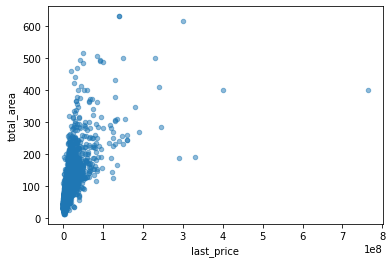

In [46]:
#выведем график рассеивания где x=цена квартиры, y=площадь 
data.plot(x='last_price',y='total_area', kind='scatter', alpha=0.5) 

В связи с тем, что на графике присутствует вброс по оси x со слишком высокой ценой, создадим переменную, исключающую данное значение. Так же, будем ее использовать для дальнейшего анализа 

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

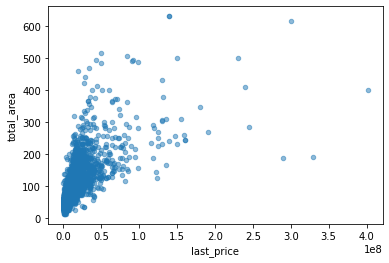

In [47]:
# создадим переменную, исключающую значения выше 500 млн.
good_prise=data.query('last_price < 500000000')
good_prise.plot(x='last_price',y='total_area', kind='scatter', alpha=0.5) 

In [48]:
# рассчитаем корреляцию 
print(good_prise['last_price'].corr(data['total_area']))

0.6954905991271776


На данном графике видна взаимосвязь площади и цены. Основная концентрация квартир с площадью от минимальной до 100 кв.м. имеют цену от 0 до 0,5 * 10^8. Квартиры площаью 150 кв.м. имеют скачек цен до 1 * 10^8. Квартиры с большей площадью стоят от 0,5 до 1,5 * 10^8, но их намного меньше. В соответствии с этим, можно сделать вывод, что цена за квартиру увеличивается пропорционально ее площади. Так же посчитан коэффициент корреляции, который составил 0,7, что говорит о присутствии взаимосвязи

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

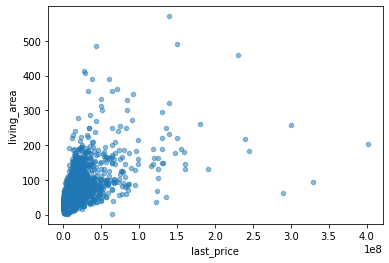

In [49]:
#выведем диаграмму рассеивания, где x=цена, y=жилая площадь
good_prise.plot(x='last_price',y='living_area', kind='scatter', alpha=0.5) 

In [50]:
# рассчитаем корреляцию 
print(good_prise['last_price'].corr(data['living_area']))

0.6094473278784295


На графике изображенна взаимосвязь цены за квартиру от жилой площади. График похож на тот, на котором указана взаимосвязь цены квартиры от общей площади. За исключением некоторых моментов. Цена квартир с жилой площадью 50 кв.м. резко увеличивается до 0,5 * 10^8. В соответствии с этим, можно сделать вывод, что жилая площадь больше влияет на цену. Для проверки, выведем на экран график взаимосвязи цены на кв.м. и жилой площади. Так же посчитан коэффициент корреляции, который составил 0,6, что говорит о присутствии взаимосвязи, но не очень большой.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

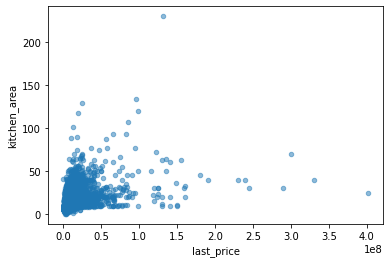

In [51]:
#выведем диаграмму рассеивания, где x=цена, y=площадь кухни
good_prise.plot(x='last_price',y='kitchen_area', kind='scatter', alpha=0.5) 

In [52]:
# рассчитаем корреляцию 
print(good_prise['last_price'].corr(data['kitchen_area']))

0.4602818550571706


На графике изображена взаимосвязь площади кухни с ценой. Основная концентрация располагается в диапазоне цен от 0 до 0,5 * 10^8, площадью кухни от 0 до 50 м. Притом, ближе к 50, цена уменьшается до 0,25 * 10^8. Так же посчитан коэффициент корреляции, который составил 0,46, что говорит о слабой взаимосвязи.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

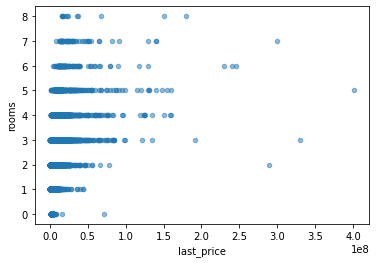

In [53]:
#выведем диаграмму рассеивания, где x=цена, y=количество комнат
good_prise.plot(x='last_price',y='rooms', kind='scatter', alpha=0.5) 

In [54]:
#рассчитаем корреляцию
print(good_prise['last_price'].corr(data['rooms']))

0.3871350596683471


На графике изображенна взаимосвязь между ценой и количеством комнат. На нем видно, что основная концентрация цен располагается в диапазоне от 0 до 0,4 * 10^8, независимо от количества комнат. Так же посчитан коэффициент корреляции, который составил 0,39, что говорит о слабой взаимосвязи. 

<AxesSubplot:xlabel='last_price', ylabel='type_floor'>

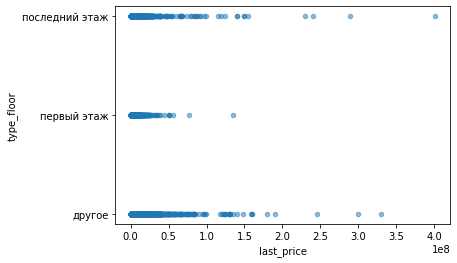

In [55]:
#выведем диаграмму рассеивания, где x=цена, y=тип этажа
good_prise.plot(x='last_price',y='type_floor', kind='scatter', alpha=0.5) 

На графике изображена взаимосвязь цены и этажности. Цена за квартиры на первом этаже заметно ниже, чем на последнем и других этажах (от 0 до 0,4 * 10^8). Цены на квартиры располагающиеся на последнем этаже и других, варьируют в диапазоне от 0 до 1 * 10^8 (самая высокая концентрация 0 до 0,7-0,8 * 10^8).

<AxesSubplot:xlabel='last_price', ylabel='weekday'>

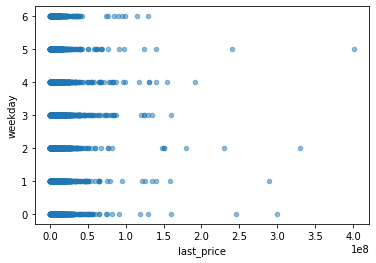

In [56]:
#выведем диаграмму рассеивания, где x=цена, y=день недели
good_prise.plot(x='last_price',y='weekday', kind='scatter', alpha=0.5) 

In [57]:
# рассчитаем корреляцию
print(good_prise['last_price'].corr(data['weekday']))

-0.0019349707982172248


На графике видно изображена зависимость цены от дня недели, когда было опубликовано объявление. Независимо от дня недели, цена остается преждней. Так же посчитан коэфициент корреляции, который составил -0,001, что говорит о полном отсутсвии взаимосвязи.

<AxesSubplot:xlabel='last_price', ylabel='month'>

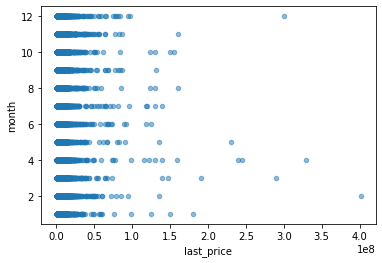

In [58]:
#выведем диаграмму рассеивания, где x=цена, y=месяц размещения
good_prise.plot(x='last_price',y='month', kind='scatter', alpha=0.5) 

In [59]:
#рассчитаем корреляцию
print(good_prise['last_price'].corr(data['month']))

-0.0008805936492963859


На графике изображена зависимость цены от месяца, когда было опубликовано объявление. Так же как и с днями неделями, месяц публикации не влияет на цену. Так же посчитан коэфициент корреляции, который составил -0,0008, что говорит о полном отсутсвии взаимосвязи.

<AxesSubplot:xlabel='last_price', ylabel='year'>

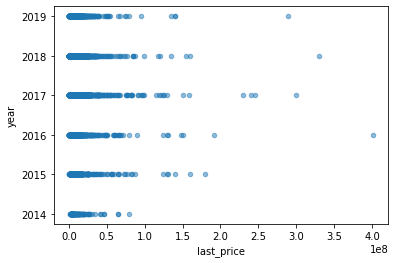

In [60]:
#выведем диаграмму рассеивания, где x=цена, y=год размещения объявления
good_prise.plot(x='last_price',y='year', kind='scatter', alpha=0.5) 

In [61]:
#рассчитаем корреляцию
print(good_prise['last_price'].corr(data['year']))

-0.04912934261668332


На графике изображена зависимость цены от года, когда было опубликовано объявление. Та же картина, что и с днями недели, месяцами: отсутствие взаимосвязи, о чем говорит и коэффициент корреляции, который составил -0,4.

In [62]:
# посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
avg_price_of_metr=good_prise.pivot_table(index='locality_name', values='price_of_meter', aggfunc=['count', 'median'])#сохраним в новой переменной сводную таблицу по населенным пунктам, с количеством объявлений и средней ценой за метр
avg_price_of_metr.columns=['Количество объявлений', 'Средняя']
avg_price_of_metr=avg_price_of_metr.sort_values(by='Количество объявлений', ascending=False)
rating=avg_price_of_metr[:10] #сохраним в переменной топ-10 населенных пунктов
print('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:')
display(rating)
max=rating['Средняя'].max()
min=rating['Средняя'].min()
print('Населённые пункты с самой низкой и высокой стоимостью квадратного метра:')
display(rating.query('Средняя == @min'), rating.query('Средняя == @max'))

Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:


,Количество объявлений,Средняя
locality_name,,
Санкт-Петербург,15700,104766.085539
поселок Мурино,556,85878.462169
поселок Шушары,440,76876.172608
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67796.610169
деревня Кудрово,299,91860.465116


Населённые пункты с самой низкой и высокой стоимостью квадратного метра:


,Количество объявлений,Средняя
locality_name,,
Выборг,237,58158.319871


,Количество объявлений,Средняя
locality_name,,
Санкт-Петербург,15700,104766.085539


Топ-10 населенных пунктов, с наибольшим количеством объявления: Санкт-Петербург, поселок Мурино, Пушкин, поселок Шушары, поселок Парголово, деревня Кудрово, Всеволожск, Колпино, Гатчина, Сестрорецк. Самая низкая цена за квадратный метрв во Всеволожске, самая высокая - в Санкт-Петербугре.

In [63]:
# рассчитаем среднюю цену каждого километра до центра Санкт-Петербурга
data['avg_price_of_km']=(data['last_price']/data['cityCenters_nearest_km'])/data['cityCenters_nearest_km']#создадим колонку, содержащую среднюю цену каждого метра до центра города
sp=data.loc[data['locality_name']=='Санкт-Петербург']#выделим Санкт-Петербург среди городов и сохраним данные в переменную
sp_pivot=sp.pivot_table(index='cityCenters_nearest_km', values='avg_price_of_km').round()#создадим сводную таблицу по новой переменной
sp_pivot.columns=['цена каждого километра до центра']
display(sp_pivot)

,цена каждого километра до центра
cityCenters_nearest_km,
0.0,inf
1.0,21144976.0
2.0,4438285.0
3.0,1209707.0
4.0,828407.0
5.0,575855.0
6.0,426067.0
7.0,301534.0
8.0,144426.0


Самая высокая цена на квартиры, которые находятся в километре от центра, средняя цена этого километра составила 21144976.0 руб. Самое большое расстояние от центра города составляет 29 км, что увеличивает стоимость квартиры на 5038.0 руб. за каждый километр

<AxesSubplot:title={'center':'Динамика цены относительно удалённости от центра'}, xlabel='cityCenters_nearest_km'>

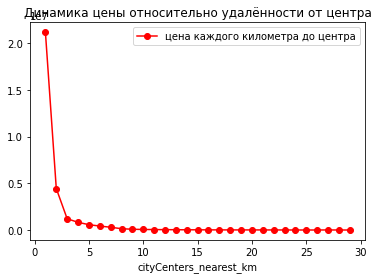

In [64]:
sp_pivot.plot(title='Динамика цены относительно удалённости от центра', style='-o', color='red')

На графике наглядно видно, как цена резко падает уже к 2 км. от центра. А начиная с 5 км. цена снижается совсем медленно, что после 10 км. даже не заметно.

### Общий вывод


В процессе предобработки данных было обнаружено, что данные таблицы содержат ошибки и пропущенные значения. В связи с этим, для проведения более качественного анализа проведены следующие действия:

Заменены пропуски:

- в столбцах ceiling_height и cityCenters_nearest на медианные значения в зависимости от населенного пункта
- в столбце floors_total на медианное значения
- в kitchen_area на разницу между total_area и living_area, а оставшиеся значения на медианные
- в living_area на разницу между total_area и kitchen_area
- в колонках balcony, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition на 0, так как вероятнее всего, что балконов, парков и прудов нет.
Столбцы is_apartment и days_exposition оставлены без изменений, так как заполнить в них пропуски не представляется возможным.

Обнаружены и исправлены дубликаты значений в колонке locality_name.

Устранены аномальные значения в колонках  ceiling_height (неправдоподобно большие значения поделены на 10) и rooms (удалены строки с квартирами, количество которых превышает 8)

Для проведения исследования были добавлены следующие колонки: price_of_meter, weekday, month, year, type_floor, cityCenters_nearest_km.

Проанализировано влияние следующих факторов на цену квартиры: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.

Наибольшее влияние на цену оказывает общая площадь, жилая площадь и этажность (если квартира находится на первом и последнем этажах, то цена ниже). Количество комнат и площадь кухни оказывают слабое влияние на цену, но все же наблюдается небольшое повышение цены при увеличении площади кухни или количества комнат. День, месяц, год размещения объявления никак не влияют на цену квартиры.

Так же проведено исследование, какая средняя цена квадратного метра в 10 населенных пунктах с самым большим количеством объявлений. Самая низкая цена за квадратный метр во Всеволожске, самая высокая - в Санкт-Петербурге. 
Так как в Санкт-Петербурге самая высокая средняя цена за квадратный метр, было проанализировано как меняется цена в зависимости от удаленности от центра.  Средняя цена на квартиры в километре от центра составила 21144976 руб. Далее наблюдается резкое снижение цены, а после 10 километров, цена начинает снижаться плавно и незаметно. 
